In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import sqlalchemy as sqla



#Check if there's wind data, there is! (want wind, precip, air temperature)
#Check if trend of increase in ave temperature, high wind conditons, low amounts of precipitation

#AWND', 'PRCP', 'TMAX', 'TAVG' 'EMXT'
#Average wind speed, precip, max temp, average temp,extreme max temp for the period

In [2]:
dates = pd.date_range(start = "01-01-2000", end = "12-31-2020", freq = 'Y')#get years
dates = dates.strftime("%Y")#extract year 
dates = dates.to_list() #put dates into a python list

In [3]:

#web services token request to get access API
token = {'token':'MrWrsDFlCRWqtWFmHQIWDvZhwgvayJqH'}
#LA station
#station_id = 'GHCND:USW00093134'

df = []
for i in dates: #start and end parameters can only do one year so this is ho
    #print(i)
    responses = requests.get(url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USW00093134&datatypeid=TMAX&datatypeid=TMIN&datatypeid=PRCP&datatypeid=TAVG&datatypeid=AWND&limit=1000&startdate="+str(i)+"-01-01&enddate="+str(i)+"-12-31&units=standard" , headers = token)
    response_js = responses.json()
    #print(response_js)
#     print(response_js)  
    df_temp = pd.DataFrame(response_js["results"]) #want results part with all those columns
    #print(df) #df has to be in loop to get all the years 
    df.append(df_temp[['date', 'datatype', 'value']]) #get columns you want
    #print(df) #appended entire dataframe to list to keep all the years, so won't have to worry about adding them
station_df = pd.concat(df) #make list of iterated dataframes to one dataframe
station_df['date'] = pd.to_datetime(station_df['date'])
#print(station_df.columns)
#print(station_df)
la_dat = station_df.pivot_table('value', 'date', 'datatype').reset_index()#leave date
#print(la_dat)
# print(la_dat)
la_dat['year'] = la_dat['date'].dt.year #make year column getting year from datetime
#print(type(la_dat)) 
#print(la_dat)
#final_la = la_dat[['date', 'year', 'AWND', 'PRCP', 'TMAX', 'TAVG']]
final_la = la_dat[['date', 'year','PRCP', 'TMAX', 'TMIN', 'AWND']]
final_la.dropna() #drop na values
# final_la.head()

final_la['TAVG'] = final_la[['TMAX', 'TMIN']].mean(axis=1)
#Take average of the values in each column and group by year so only 2000-2022 individually
final_la_result = final_la.groupby('year').mean()
final_la_result.head()


datatype,PRCP,TMAX,TMIN,AWND,TAVG
year,,,,,
2000,0.053650,72.425,55.035,2.816500,63.7300
2001,0.083284,70.855,53.695,2.790547,62.2750
2002,0.007800,71.790,54.020,2.895000,62.9050
2003,0.053500,72.875,55.120,2.712000,63.9975
2004,0.032850,73.565,55.755,2.440500,64.6600


/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


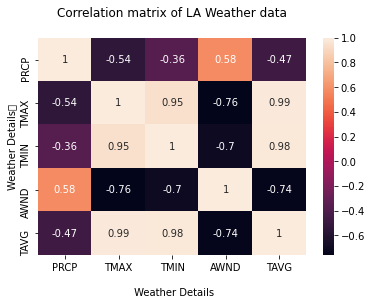

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

hm = sns.heatmap(final_la_result.corr(), annot = True)
hm.set(xlabel='\n Weather Details', ylabel='Weather Details\t', title = "Correlation matrix of LA Weather data\n")

plt.show()

In [5]:
import matplotlib.dates as mdates

Text(0.5, 1.0, 'Average Monthly Temperature and Total Monthly Precipitation for each year')

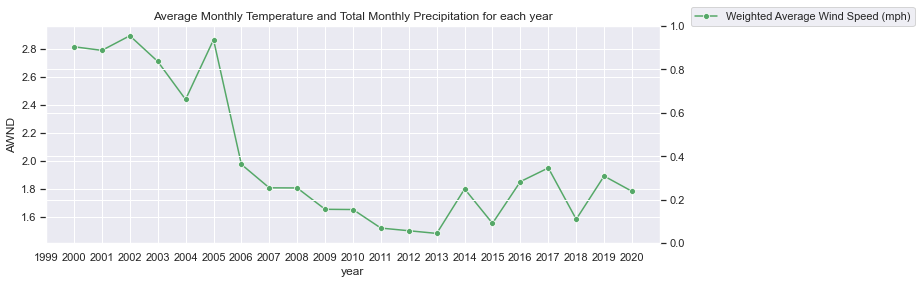

In [6]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

#Did average of average wind speeds
final_la_result.index = pd.to_datetime(final_la_result.index, format = '%Y')

sns.lineplot(data=final_la_result["AWND"],  marker="o",color="g", label = "Weighted Average Wind Speed (mph)", estimator = None),
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

ax2 = plt.twinx()

ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.set_title('Average Monthly Temperature and Total Monthly Precipitation for each year')

#COMBINE PLOTS LATER, do we need different info, like evaporation too, and superimpose that over temp? to compare?

#SUPERIMPOSE LINE PLOTS OF VARIABLES correlated
#FINISH OTHER VARIABLES

#Maybe also focus on monthly with a focus on 2022?

#Just Weighted Ave Wind Speed rn

Text(0.5, 1.0, 'Average Monthly Temperature and Total Monthly Precipitation for each year')

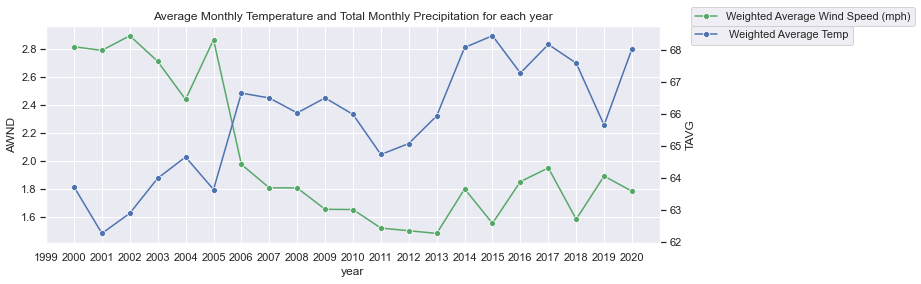

In [7]:
#FINISH OTHER VARIABLES
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.dates as mdates
sns.set(rc={'figure.figsize':(11, 4)})
pd.to_datetime(final_la_result.index) 


sns.lineplot(data=final_la_result["AWND"],  marker="o",color="g", label = "Weighted Average Wind Speed (mph)", estimator = None),
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

ax2 = plt.twinx()
sns.lineplot(data=final_la_result["TAVG"], marker="o",color="b", label = " Weighted Average Temp", ax = ax2, estimator = None)

# plt.legend()
ax2.grid(None) #Make both axis same  grid lines



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #move legend

ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.set_title('Average Monthly Temperature and Total Monthly Precipitation for each year')


#FIX PLOTS SO EACH YEAR? x-axis


Text(0.5, 1.0, 'Average Monthly Temperature and Total Monthly Precipitation for each year')

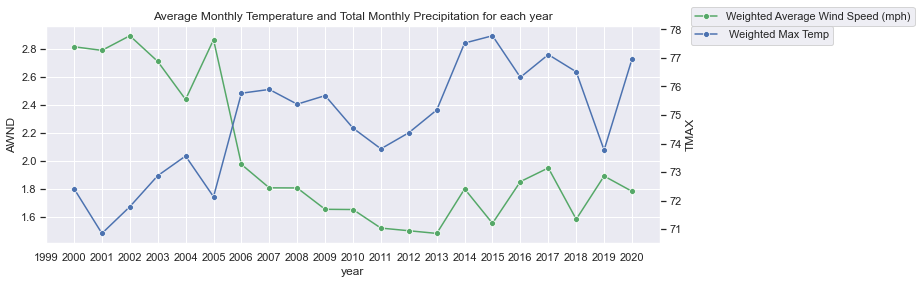

In [8]:
sns.set(rc={'figure.figsize':(11, 4)})
pd.to_datetime(final_la_result.index) 


sns.lineplot(data=final_la_result["AWND"],  marker="o",color="g", label = "Weighted Average Wind Speed (mph)", estimator = None),
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

ax2 = plt.twinx()
sns.lineplot(data=final_la_result["TMAX"], marker="o",color="b", label = " Weighted Max Temp", ax = ax2, estimator = None)

# plt.legend()
ax2.grid(None) #Make both axis same  grid lines



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #move legend

ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.set_title('Average Monthly Temperature and Total Monthly Precipitation for each year')

Text(0.5, 1.0, 'Average Monthly Temperature and Total Monthly Precipitation for each year')

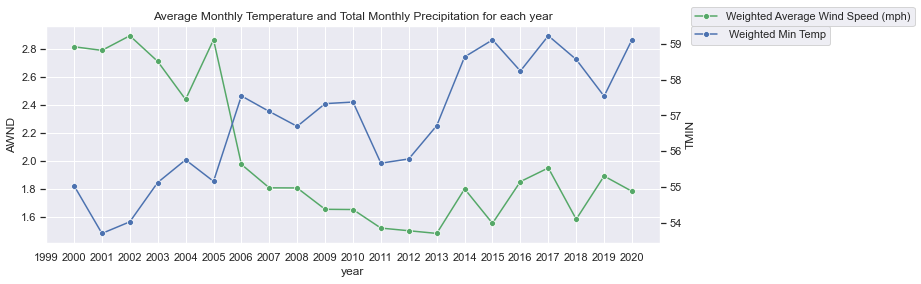

In [9]:
sns.set(rc={'figure.figsize':(11, 4)})
pd.to_datetime(final_la_result.index) 


sns.lineplot(data=final_la_result["AWND"],  marker="o",color="g", label = "Weighted Average Wind Speed (mph)", estimator = None),
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

ax2 = plt.twinx()
sns.lineplot(data=final_la_result["TMIN"], marker="o",color="b", label = " Weighted Min Temp", ax = ax2, estimator = None)

# plt.legend()
ax2.grid(None) #Make both axis same  grid lines



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #move legend

ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.set_title('Average Monthly Temperature and Total Monthly Precipitation for each year')

Text(0.5, 1.0, 'Average Monthly Temperature and Total Monthly Precipitation for each year')

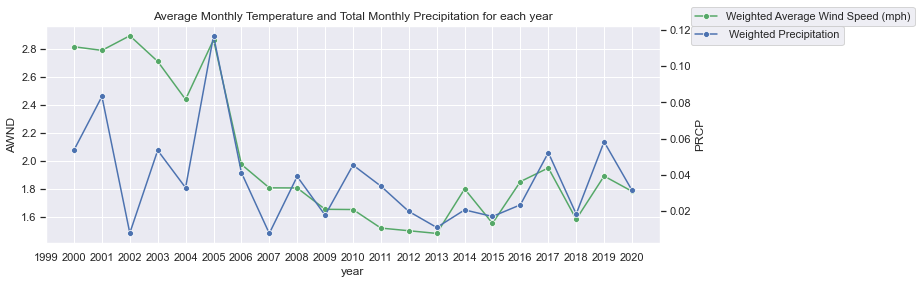

In [10]:
sns.set(rc={'figure.figsize':(11, 4)})
pd.to_datetime(final_la_result.index) 


sns.lineplot(data=final_la_result["AWND"],  marker="o",color="g", label = "Weighted Average Wind Speed (mph)", estimator = None),
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

ax2 = plt.twinx()
sns.lineplot(data=final_la_result["PRCP"], marker="o",color="b", label = " Weighted Precipitation", ax = ax2, estimator = None)

# plt.legend()
ax2.grid(None) #Make both axis same  grid lines



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #move legend

ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.set_title('Average Monthly Temperature and Total Monthly Precipitation for each year')

Text(0.5, 1.0, 'Average Monthly Temperature and Total Monthly Precipitation for each year')

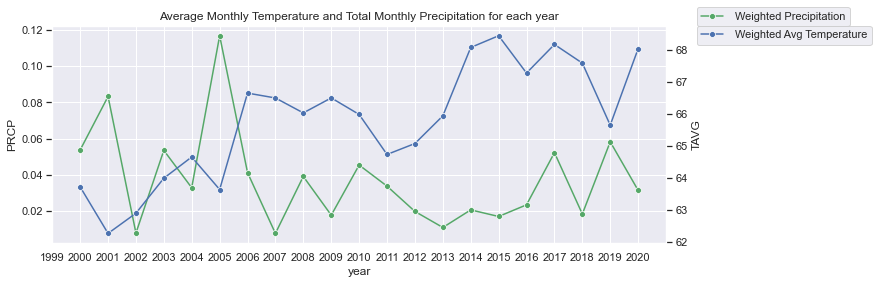

In [11]:
sns.set(rc={'figure.figsize':(11, 4)})
pd.to_datetime(final_la_result.index) 


sns.lineplot(data=final_la_result["PRCP"],  marker="o",color="g", label = " Weighted Precipitation", estimator = None),
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

ax2 = plt.twinx()
sns.lineplot(data=final_la_result["TAVG"], marker="o",color="b", label = " Weighted Avg Temperature", ax = ax2, estimator = None)

# plt.legend()
ax2.grid(None) #Make both axis same  grid lines



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #move legend

ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.set_title('Average Monthly Temperature and Total Monthly Precipitation for each year')

Text(0.5, 1.0, 'Average Monthly Temperature and Total Monthly Precipitation for each year')

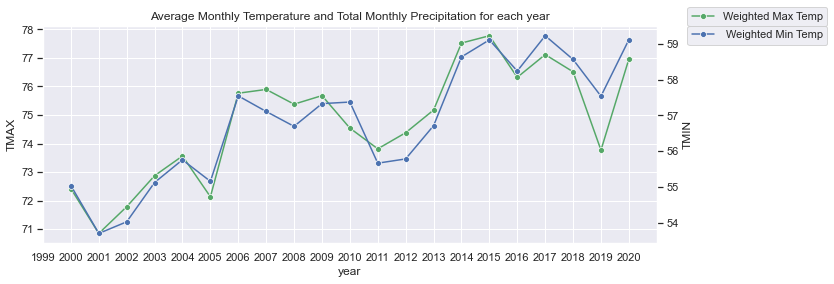

In [12]:
sns.lineplot(data=final_la_result["TMAX"],  marker="o",color="g", label = "Weighted Max Temp", estimator = None),
plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

ax2 = plt.twinx()
sns.lineplot(data=final_la_result["TMIN"], marker="o",color="b", label = " Weighted Min Temp", ax = ax2, estimator = None)

# plt.legend()
ax2.grid(None) #Make both axis same  grid lines



plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #move legend

ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.set_title('Average Monthly Temperature and Total Monthly Precipitation for each year')

# SF

In [14]:
#web services token request to get access API
token = {'token':'MrWrsDFlCRWqtWFmHQIWDvZhwgvayJqH'}
#LA station
#station_id = 'GHCND:USC00042294'

df = []
for i in dates: #start and end parameters can only do one year so this is ho
    #print(i)
    responses = requests.get(url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USW00023272&datatypeid=TMAX&datatypeid=TMIN&datatypeid=PRCP&datatypeid=TAVG&datatypeid=AWND&limit=1000&startdate="+str(i)+"-01-01&enddate="+str(i)+"-12-31&units=standard" , headers = token)
    response_js = responses.json()
    #print(response_js)
#     print(response_js)  
    df_temp = pd.DataFrame(response_js["results"]) #want results part with all those columns
    #print(df) #df has to be in loop to get all the years 
    df.append(df_temp[['date', 'datatype', 'value']]) #get columns you want
    #print(df) #appended entire dataframe to list to keep all the years, so won't have to worry about adding them
station_df = pd.concat(df) #make list of iterated dataframes to one dataframe
station_df['date'] = pd.to_datetime(station_df['date'])
#print(station_df.columns)
#print(station_df)
la_dat = station_df.pivot_table('value', 'date', 'datatype').reset_index()#leave date
#print(la_dat)
# print(la_dat)
la_dat['year'] = la_dat['date'].dt.year #make year column getting year from datetime
#print(type(la_dat)) 
#print(la_dat)
#final_la = la_dat[['date', 'year', 'AWND', 'PRCP', 'TMAX', 'TAVG']]
final_la = la_dat[['date', 'year','PRCP', 'TMAX', 'TMIN', 'AWND']]
final_la.dropna() #drop na values
# final_la.head()

final_la['TAVG'] = final_la[['TMAX', 'TMIN']].mean(axis=1)
#Take average of the values in each column and group by year so only 2000-2022 individually
final_la_result = final_la.groupby('year').mean()
final_la_result.head()

KeyError: "['AWND'] not in index"

# Santa Barbara